In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import pandas as pd
import requests

In [4]:
shapefile_path=r"E:\BD Data-20240114T083501Z-001\BD Data\BD_districts.shp"
districts=gpd.read_file(shapefile_path)
districts.head()



,OBJECTID,admin2Name,admin2Pcod,admin1Name,admin1Pcod,admin0Name,admin0Pcod,date,Shape_Leng,Shape_Area,Area,geometry
0,1,Bagerhat,4001,Khulna,40,Bangladesh,BD,2015-01-01,12.929816,0.319709,3643.34,"MULTIPOLYGON (((483486.808 2413780.377, 483518..."
1,2,Bandarban,2003,Chittagong,20,Bangladesh,BD,2015-01-01,5.358126,0.401359,4598.39,"POLYGON ((745209.502 2471361.066, 745307.503 2..."
2,3,Barguna,1004,Barisal,10,Bangladesh,BD,2015-01-01,4.167970,0.117801,1344.58,"MULTIPOLYGON (((487586.812 2441541.773, 487480..."
3,4,Barisal,1006,Barisal,10,Bangladesh,BD,2015-01-01,7.713625,0.195228,2217.88,"MULTIPOLYGON (((556973.901 2498540.391, 556979..."
4,5,Bhola,1009,Barisal,10,Bangladesh,BD,2015-01-01,10.091155,0.170812,1947.27,"MULTIPOLYGON (((579740.046 2417082.537, 579479..."


In [5]:
population_path=r"E:\Map Making with Python\Population Data\bgd_admpop_adm2_2022.csv"
population=pd.read_csv(population_path)
population.head()

,year,ISO3,ADM0_NAME,ADM0_PCODE,ADM1_NAME,ADM1_PCODE,ADM2_NAME,ADM2_PCODE,F_TL,M_TL,...,T_35_39,T_40_44,T_45_49,T_50_54,T_55_59,T_60_64,T_65_69,T_70_74,T_75_79,T_80Plus
0,2022,BGD,Bangladesh,BD,Barisal,BD10,Barguna,BD1004,472401,425887,...,68436,59206,59252,53363,47159,38813,30569,22397,15623,14120
1,2022,BGD,Bangladesh,BD,Barisal,BD10,Barisal,BD1006,1150901,1042061,...,150992,139864,138721,125237,104310,94294,72147,56495,35487,33189
2,2022,BGD,Bangladesh,BD,Barisal,BD10,Bhola,BD1009,911898,860217,...,115533,98503,90916,84539,76912,68268,53858,37817,24062,20547
3,2022,BGD,Bangladesh,BD,Barisal,BD10,Jhalokati,BD1042,341741,297582,...,44125,43031,42788,37832,33496,28584,24465,18102,12330,10603
4,2022,BGD,Bangladesh,BD,Barisal,BD10,Patuakhali,BD1078,811884,736425,...,110724,96995,94862,88238,76468,66553,51837,37579,24250,22742


In [7]:
filtered=population[['ADM2_NAME','T_TL']]
filtered=filtered.rename(columns={
    'ADM2_NAME':'admin2Name',
    'T_TL':'total_population'
})
filtered


,admin2Name,total_population
0,Barguna,898288
1,Barisal,2192962
2,Bhola,1772115
3,Jhalokati,639323
4,Patuakhali,1548309
...,...,...
59,Thakurgaon,1532697
60,Habiganj,2404043
61,Maulvibazar,2217984
62,Sunamganj,2945083


In [8]:
gdf=districts.merge(filtered,on='admin2Name')
gdf.head()

,OBJECTID,admin2Name,admin2Pcod,admin1Name,admin1Pcod,admin0Name,admin0Pcod,date,Shape_Leng,Shape_Area,Area,geometry,total_population
0,1,Bagerhat,4001,Khulna,40,Bangladesh,BD,2015-01-01,12.929816,0.319709,3643.34,"MULTIPOLYGON (((483486.808 2413780.377, 483518...",1338096
1,2,Bandarban,2003,Chittagong,20,Bangladesh,BD,2015-01-01,5.358126,0.401359,4598.39,"POLYGON ((745209.502 2471361.066, 745307.503 2...",497397
2,3,Barguna,1004,Barisal,10,Bangladesh,BD,2015-01-01,4.167970,0.117801,1344.58,"MULTIPOLYGON (((487586.812 2441541.773, 487480...",898288
3,4,Barisal,1006,Barisal,10,Bangladesh,BD,2015-01-01,7.713625,0.195228,2217.88,"MULTIPOLYGON (((556973.901 2498540.391, 556979...",2192962
4,5,Bhola,1009,Barisal,10,Bangladesh,BD,2015-01-01,10.091155,0.170812,1947.27,"MULTIPOLYGON (((579740.046 2417082.537, 579479...",1772115


In [9]:
gdf['density']=gdf['total_population']/gdf['Area'] #the area is in square kilometers thats why dont need to multiply
gdf.head()

,OBJECTID,admin2Name,admin2Pcod,admin1Name,admin1Pcod,admin0Name,admin0Pcod,date,Shape_Leng,Shape_Area,Area,geometry,total_population,density
0,1,Bagerhat,4001,Khulna,40,Bangladesh,BD,2015-01-01,12.929816,0.319709,3643.34,"MULTIPOLYGON (((483486.808 2413780.377, 483518...",1338096,367.271789
1,2,Bandarban,2003,Chittagong,20,Bangladesh,BD,2015-01-01,5.358126,0.401359,4598.39,"POLYGON ((745209.502 2471361.066, 745307.503 2...",497397,108.167641
2,3,Barguna,1004,Barisal,10,Bangladesh,BD,2015-01-01,4.167970,0.117801,1344.58,"MULTIPOLYGON (((487586.812 2441541.773, 487480...",898288,668.080739
3,4,Barisal,1006,Barisal,10,Bangladesh,BD,2015-01-01,7.713625,0.195228,2217.88,"MULTIPOLYGON (((556973.901 2498540.391, 556979...",2192962,988.764947
4,5,Bhola,1009,Barisal,10,Bangladesh,BD,2015-01-01,10.091155,0.170812,1947.27,"MULTIPOLYGON (((579740.046 2417082.537, 579479...",1772115,910.050994


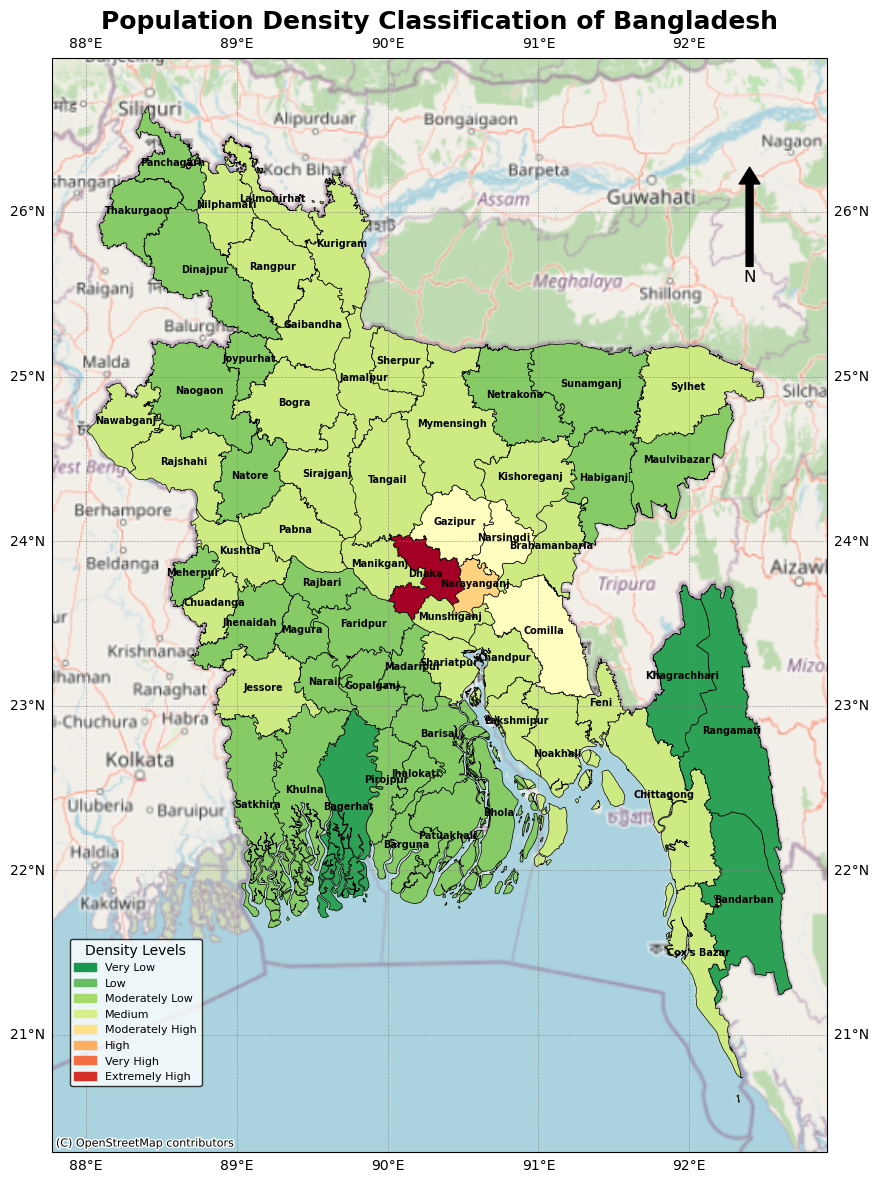

In [13]:
import contextily as ctx
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# Reproject the GeoDataFrame to WGS84 (EPSG:4326)
gdf = gdf.to_crs(epsg=4326)

# Create a Cartopy GeoAxes with PlateCarree projection
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()})
fig.set_size_inches(10, 15)

classification_kwds = {
    'bins': [100, 500, 1000, 2000, 4000, 6000, 8000, 10000, 12500] 
}

legend_kwds = {
  'loc': 'upper right',
  'bbox_to_anchor': (0.8, 0.9),
  'fmt': '{:<5.0f}',
  'frameon': False,
  'fontsize': 8,
  'title': 'Density (persons/sq.km)'
}

# Plot the GeoDataFrame
gdf.plot(ax=ax, edgecolor='black', linewidth=0.5, column='density', cmap='RdYlGn_r', scheme='User_Defined', classification_kwds=classification_kwds,
         legend=True, legend_kwds=legend_kwds, transform=ccrs.PlateCarree())

# Add labels for each shape
for idx, row in gdf.iterrows():
    # Get the centroid of the geometry
    centroid = row['geometry'].centroid
    # Add a label at the centroid (e.g., density value or another column)
    ax.text(centroid.x, centroid.y, f"{row['admin2Name']}", fontsize=7, ha='center', color='black', fontweight='bold', transform=ccrs.PlateCarree())

# Remove the default legend
ax.get_legend().remove()

# Create a custom legend for 8 classes
legend_labels = [
    ('Very Low', '#1a9850'),  # Color for the first bin
    ('Low', '#66bd63'),       # Color for the second bin
    ('Moderately Low', '#a6d96a'),  # Color for the third bin
    ('Medium', '#d9ef8b'),    # Color for the fourth bin
    ('Moderately High', '#fee08b'), # Color for the fifth bin
    ('High', '#fdae61'),      # Color for the sixth bin
    ('Very High', '#f46d43'), # Color for the seventh bin
    ('Extremely High', '#d73027')  # Color for the eighth bin
]

# Add custom legend patches
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in legend_labels]
ax.legend(handles=legend_patches, loc='upper right', bbox_to_anchor=(0.2, 0.2), frameon=True, fontsize=8, title='Density Levels', fancybox=True, edgecolor='black')

# Add graticules showing the geographic coordinate system
gridlines = ax.gridlines(draw_labels=True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

# Customize the labels for longitude and latitude
gridlines.xformatter = LongitudeFormatter()
gridlines.yformatter = LatitudeFormatter()

# Add a basemap to the plot using OpenStreetMap
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add a title
ax.set_title('Population Density Classification of Bangladesh', fontsize=18, fontweight='bold')

# Add a north arrow
x, y, arrow_length = 0.9, 0.9, 0.1  # Coordinates and length of the arrow
ax.annotate('N', xy=(x, y), xytext=(x, y - arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=12, xycoords='axes fraction')


#Saving the image
output_folder=r"E:\Map Making with Python\output"
filename='Bangladesh_pop_den.png'
output_path=os.path.join(output_folder,filename)
plt.savefig(output_path,dpi=300)


plt.show()